In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Data Cleaning Function

In [27]:
def rem_dups(df):
    df.drop_duplicates(subset=[0,1], keep='first', inplace=False)            #Dropping any duplicate columns ()
    return df

In [46]:
def clean(df):
    df = (df.drop(df.columns, axis=1)                                       #Converting any non-float values into NaN
         .join(df[df.columns].apply(pd.to_numeric, errors='coerce')))       #(fixing structural errors)
    df1 = df.dropna()                                                    #drop NaN columns
    df1 = df1.astype(float)                       #typecasting non-NaN data to float
    mean1 = df1[2].mean()                         #calculating mean of each column
    mean2 = df1[3].mean()
    mean3 = df1[4].mean()
    mean4 = df1[5].mean()
    df[2] = df[2].fillna(mean1)                   #filling all missing/NaN cells with means of respective columns
    df[3] = df[3].fillna(mean2)
    df[4] = df[4].fillna(mean3)
    df[5] = df[5].fillna(mean4)
    
    #limiting the allowed range of observations to [min,max] in the code below
    max = 30
    min = -1
    for i in range(len(df)):
        if(df.loc[i,2]>max):
            df.iloc[i,2]=max
        elif(df.loc[i,2]<min):
            df.iloc[i,2]=min
        if(df.loc[i,3]>max):
            df.iloc[i,3]=max
        elif(df.loc[i,3]<min):
            df.iloc[i,3]=min
        if(df.loc[i,4]>max):
            df.iloc[i,4]=max
        elif(df.loc[i,4]<min):
            df.iloc[i,4]=min
        if(df.loc[i,5]>max):
            df.iloc[i,5]=max
        elif(df.loc[i,5]<min):
            df.iloc[i,5]=min 
            
    if(not(df.isnull().values.any())):              #prompts that the data is now cleaned
        print("Cleaned")
            
    return df

In [21]:
unclean_data = pd.read_csv("unclean.csv",header = None)         #reading the data as a dataframe
unclean_data.head()

,0,1,2,3,4,5
0,27-02-2021 00:00,27-02-2021 00:01,0.38,0.46,0.42,0.65
1,27-02-2021 00:01,27-02-2021 00:02,0.37,0.45,0.41,0.53
2,27-02-2021 00:02,27-02-2021 00:03,0.38,0.46,0.41,0.58
3,27-02-2021 00:03,27-02-2021 00:04,0.36,0.44,0.41,0.55
4,27-02-2021 00:04,27-02-2021 00:05,0.37,0.47,0.41,0.55


In [29]:
if(unclean_data.isnull().values.any()):                     #checking to see if the data as NaNs/structural errors
    print("Data is not cleaned")

Data is not cleaned


In [40]:
nodups = rem_dups(unclean_data)
nodups.iloc[:,2:6]

,2,3,4,5
0,0.38,0.46,0.42,0.65
1,0.37,0.45,0.41,0.53
2,0.38,0.46,0.41,0.58
3,0.36,0.44,0.41,0.55
4,0.37,0.47,0.41,0.55
...,...,...,...,...
53816,9.97,11.1,10.44,6.21
53817,9.97,11.5,10.74,5.74
53818,10.12,11.74,10.82,6.29
53819,9.51,10.84,10.23,6.08


In [57]:
to_be_cleaned = nodups.iloc[:,2:6]
to_be_cleaned

,2,3,4,5
0,0.38,0.46,0.42,0.65
1,0.37,0.45,0.41,0.53
2,0.38,0.46,0.41,0.58
3,0.36,0.44,0.41,0.55
4,0.37,0.47,0.41,0.55
...,...,...,...,...
53816,9.97,11.1,10.44,6.21
53817,9.97,11.5,10.74,5.74
53818,10.12,11.74,10.82,6.29
53819,9.51,10.84,10.23,6.08


In [58]:
clean_data = clean(to_be_cleaned)                            #calling the cleaning function to clean the data
clean_data_with_time = pd.concat([unclean_data.iloc[:,:2], clean_data], axis=1)

Cleaned


In [24]:
unclean_data

,0,1,2,3,4,5
0,27-02-2021 00:00,27-02-2021 00:01,0.38,0.46,0.42,0.65
1,27-02-2021 00:01,27-02-2021 00:02,0.37,0.45,0.41,0.53
2,27-02-2021 00:02,27-02-2021 00:03,0.38,0.46,0.41,0.58
3,27-02-2021 00:03,27-02-2021 00:04,0.36,0.44,0.41,0.55
4,27-02-2021 00:04,27-02-2021 00:05,0.37,0.47,0.41,0.55
...,...,...,...,...,...,...
53816,14-01-2021 23:57,14-01-2021 23:58,9.97,11.1,10.44,6.21
53817,14-01-2021 23:58,14-01-2021 23:59,9.97,11.5,10.74,5.74
53818,14-01-2021 23:59,15-01-2021 00:00,10.12,11.74,10.82,6.29
53819,From,To,9.51,10.84,10.23,6.08


In [25]:
unclean_data.iloc[226,:] #had empty cells

0    27-02-2021 03:46
1    27-02-2021 03:47
2                 NaN
3                 NaN
4                 NaN
5                 NaN
Name: 226, dtype: object

In [54]:
clean_data

,2,3,4,5
0,0.380000,0.46000,0.420000,0.650000
1,0.370000,0.45000,0.410000,0.530000
2,0.380000,0.46000,0.410000,0.580000
3,0.360000,0.44000,0.410000,0.550000
4,0.370000,0.47000,0.410000,0.550000
...,...,...,...,...
53816,9.970000,11.10000,10.440000,6.210000
53817,9.970000,11.50000,10.740000,5.740000
53818,10.120000,11.74000,10.820000,6.290000
53819,9.510000,10.84000,10.230000,6.080000


In [55]:
clean_data_with_time

,0,1,2,3,4,5
0,27-02-2021 00:00,27-02-2021 00:01,0.380000,0.46000,0.420000,0.650000
1,27-02-2021 00:01,27-02-2021 00:02,0.370000,0.45000,0.410000,0.530000
2,27-02-2021 00:02,27-02-2021 00:03,0.380000,0.46000,0.410000,0.580000
3,27-02-2021 00:03,27-02-2021 00:04,0.360000,0.44000,0.410000,0.550000
4,27-02-2021 00:04,27-02-2021 00:05,0.370000,0.47000,0.410000,0.550000
...,...,...,...,...,...,...
53816,14-01-2021 23:57,14-01-2021 23:58,9.970000,11.10000,10.440000,6.210000
53817,14-01-2021 23:58,14-01-2021 23:59,9.970000,11.50000,10.740000,5.740000
53818,14-01-2021 23:59,15-01-2021 00:00,10.120000,11.74000,10.820000,6.290000
53819,From,To,9.510000,10.84000,10.230000,6.080000


In [4]:
def preclean(df):
    df.drop_duplicates(subset=None, keep='first', inplace=False)            #Dropping any duplicate columns ()
    df = (df.drop(df.columns, axis=1)                                       #Converting any non-float values into NaN
         .join(df[df.columns].apply(pd.to_numeric, errors='coerce')))       #(fixing structural errors)
    df1 = df.dropna()                                                    #drop NaN columns
    df1 = df1.astype(float)
    return df

In [5]:
forplot = preclean(unclean_data)

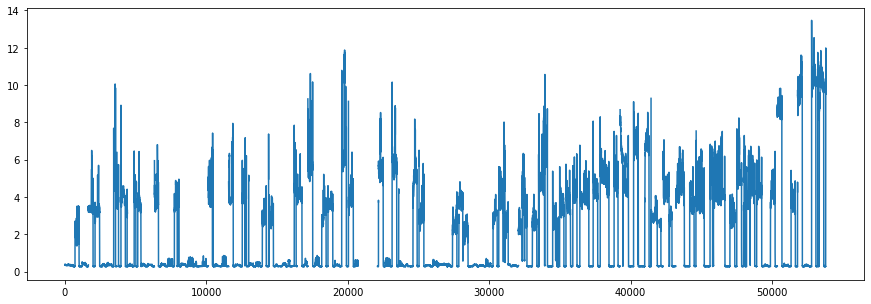

In [8]:
plt.figure(figsize = [15,5])
plt.plot(forplot.index,forplot.iloc[:,0])

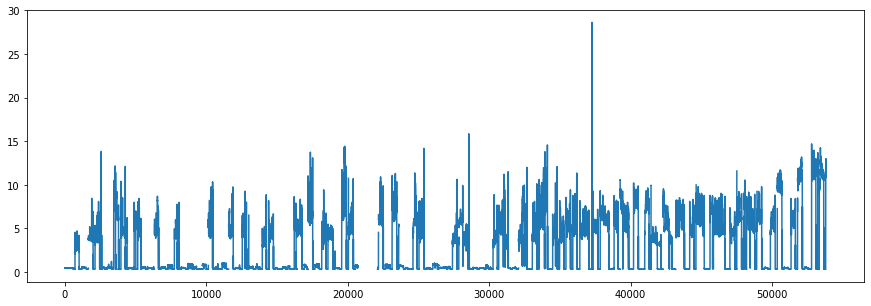

In [9]:
plt.figure(figsize = [15,5])
plt.plot(forplot.index,forplot.iloc[:,1])

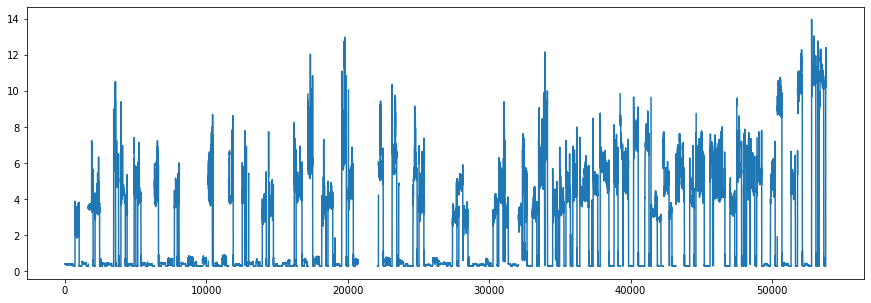

In [10]:
plt.figure(figsize = [15,5])
plt.plot(forplot.index,forplot.iloc[:,2])

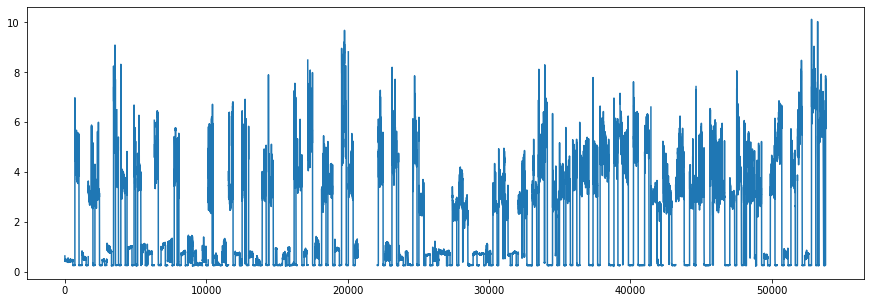

In [11]:
plt.figure(figsize = [15,5])
plt.plot(forplot.index,forplot.iloc[:,3])